# Project B Part A

In [70]:
import pandas as pd
import csv
data = pd.read_csv('interests.csv')

## How many users are there?

In [48]:
print('How many users are there? ', (data.drop_duplicates(subset='user_id', keep='first')).shape[0])

How many users are there?  3042


## How many interest categories were created by users?

In [66]:
print('How many interest categories are created by user? ', (data.drop_duplicates(subset=' category', keep='first')).shape[0])

How many interest categories are created by user?  883


## What is the distribution of interests in the entire population of individuals?

In [78]:
data.describe(include='object')

,category
count,106131
unique,883
top,Blues
freq,2008


In [93]:

data['freq']=data.groupby(['user_id',' category'])['user_id'].transform('count')
#pivot table using freq as rows and columns as userid 
user_interest=data.pivot_table(values='freq', aggfunc='count', columns=' category')
print(user_interest)
#transposing
user_interest=user_interest.transpose()
#reindexing for alignment
user_interest.index.name=None

#Gives a new index (columns) staring with zero
user_interest=user_interest.reset_index()

#Renaming column
user_interest=user_interest.rename(columns={'index':'category', 'freq':'No of users'})
#Can be used to construct histogram
print(user_interest.head())

#Calc mean
mean = user_interest['No of users'].mean()
print("The mean of the interests is %s" %mean)

#creating boolean value for filtering
bool=user_interest['No of users']>mean
user_interest['bool']=bool

#921 people are above mean 34.88 (ie no of interest) or 921 people are interested in more than 34 varied things
print ("%s of interest are above mean." %user_interest[bool].shape[0])


 category  Abruzzo  Acapulco  Acura  Adana  Adelaide  Adoption  Afghanistan  \
freq            45        69     84    111        87        54           50   

 category  Africa  Agra  Agritourism   ...    Yamanashi  Yemen  Yokohama  \
freq           50    47           40   ...          114    245       201   

 category  Yorkshire  Youth Camps  Yunnan  Zambia  Zhejiang  Zimbabwe  Zurich  
freq            1216           56      11     136       193        81      21  

[1 rows x 883 columns]
   category  No of users
0   Abruzzo           45
1  Acapulco           69
2     Acura           84
3     Adana          111
4  Adelaide           87
The mean of the interests is 120.19365798414496
239 of interest are above mean.


In [92]:
user_interest.describe()

,No of users
count,883.000000
mean,120.193658
std,179.580274
min,1.000000
25%,30.000000
50%,61.000000
75%,131.000000
max,2008.000000


## How many declared interests do individual users have (histogram)?

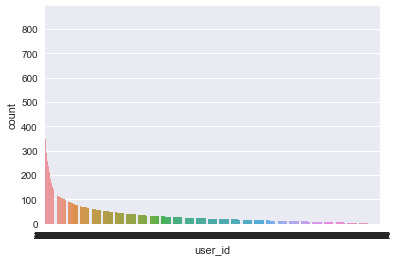

In [10]:
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x="user_id", data=data,
                   order = data["user_id"].value_counts().index)

## Connection degree distribution

## Information of the network

In [16]:
import networkx as nx
data = pd.read_csv('follows.csv')
G = nx.from_pandas_edgelist(data, source='follower_id', target=' followee_id', edge_attr=True,)
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 3599
Number of edges: 37809
Average degree:  21.0108


## Visualize the network

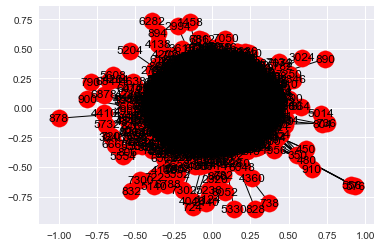

In [19]:
nx.draw_networkx(G)

## Make a basic plot of the network

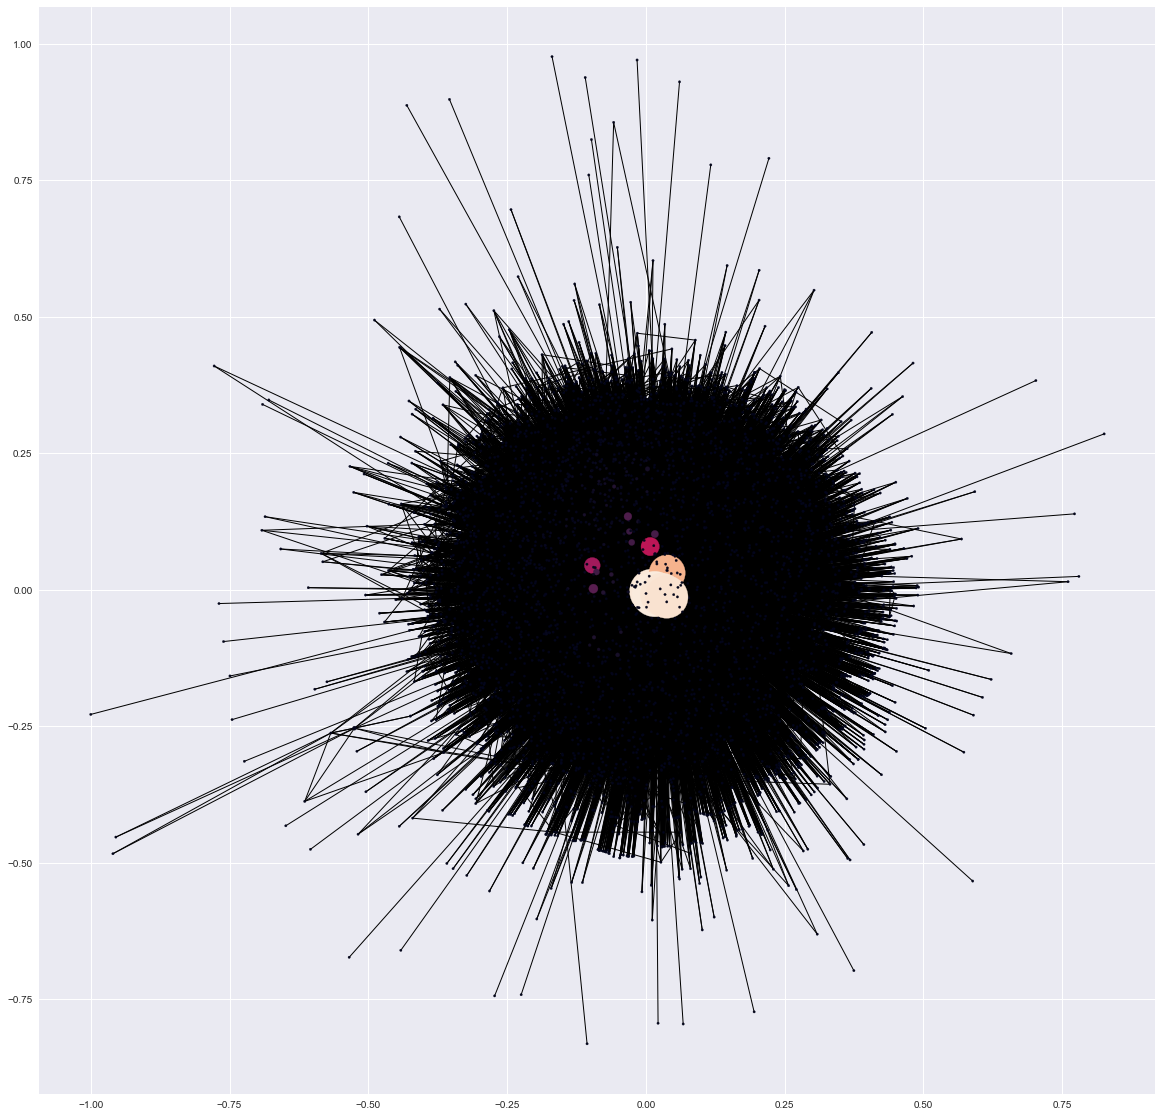

In [18]:
pos = nx.spring_layout(G)
between = nx.betweenness_centrality(G, normalized=True, endpoints=True)
node_color = [20000.0 * G.degree(v) for v in G]
node_size =  [v * 10000 for v in between.values()]

import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
nx.draw_networkx(G, pos=pos, with_labels=False, node_color=node_color, node_size=node_size )

## Connection degree histogram

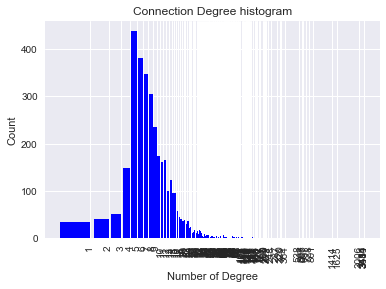

In [44]:
import collections
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

#degree sequence
degree_sequence = sorted([ d for n, d in G.degree()], reverse=True)
degreecount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreecount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, color='b')
plt.title("Connection Degree histogram")
plt.ylabel("Count")
plt.xlabel("Number of Degree")
plt.xscale('log', basex=2)
ax.set_xticks([d+0.4 for d in deg])
ax.set_xticklabels(deg, rotation = 90)
plt.show()

## Connection degree distribution

C:\Users\diana\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


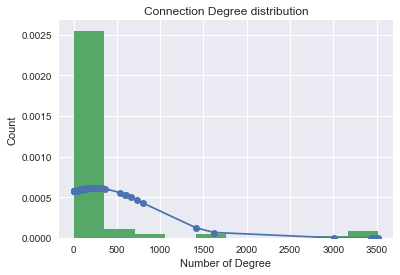

In [42]:
import numpy as np
import scipy.stats as stats
import pylab as pl
#this is a fitting indeed
fit = stats.norm.pdf(deg, np.mean(deg), np.std(deg))

pl.plot(deg,fit,'-o')
 #use this to draw histogram the data
pl.hist(deg,normed=True)     

plt.title("Connection Degree distribution")
plt.ylabel("Count")
plt.xlabel("Number of Degree")
pl.show() 